In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
#This code snippet creates a list named data containing 300 simulated values
#from an AR(1) model with a constant term and normally distributed errors.
x0 = 1 / (1 - 0.9)
sigma = 1 #standard deviation
data = [x0]
for t in range(300):
  if t == 0:
    x = 1 + 0.9 * x0 + np.random.randn() * sigma
  else:
    x = 1 + 0.9 * x + np.random.randn() * sigma
  data.append(x)

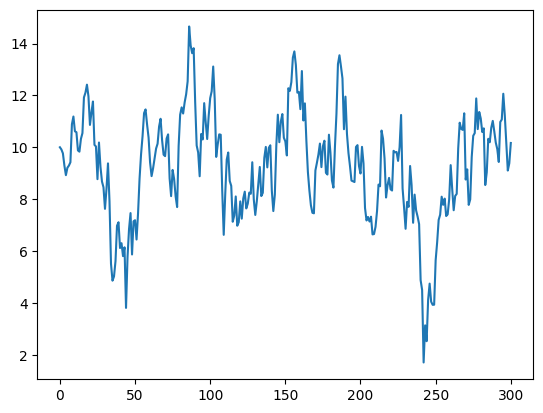

In [69]:
plt.plot(data);

In [70]:
series = pd.Series(data)

In [71]:
# ignore the problem of looking into the future for now
z = (series - series.mean()) / series.std()

In [72]:
# Calculating rolling statistics for a time series 'z'
z_mean = z.rolling(window=30).mean()
z_std = z.rolling(window=30).std()
upper_bound = z_mean + 2 * z_std
lower_bound = z_mean - 2 * z_std

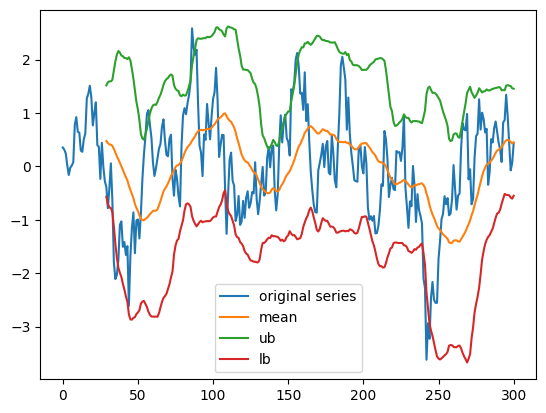

In [73]:
# Plotting the original series, its mean, and the upper & lower bounds
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()

In [74]:
long_signal = (z < lower_bound).astype(int)
short_signal = (z > upper_bound).astype(int)

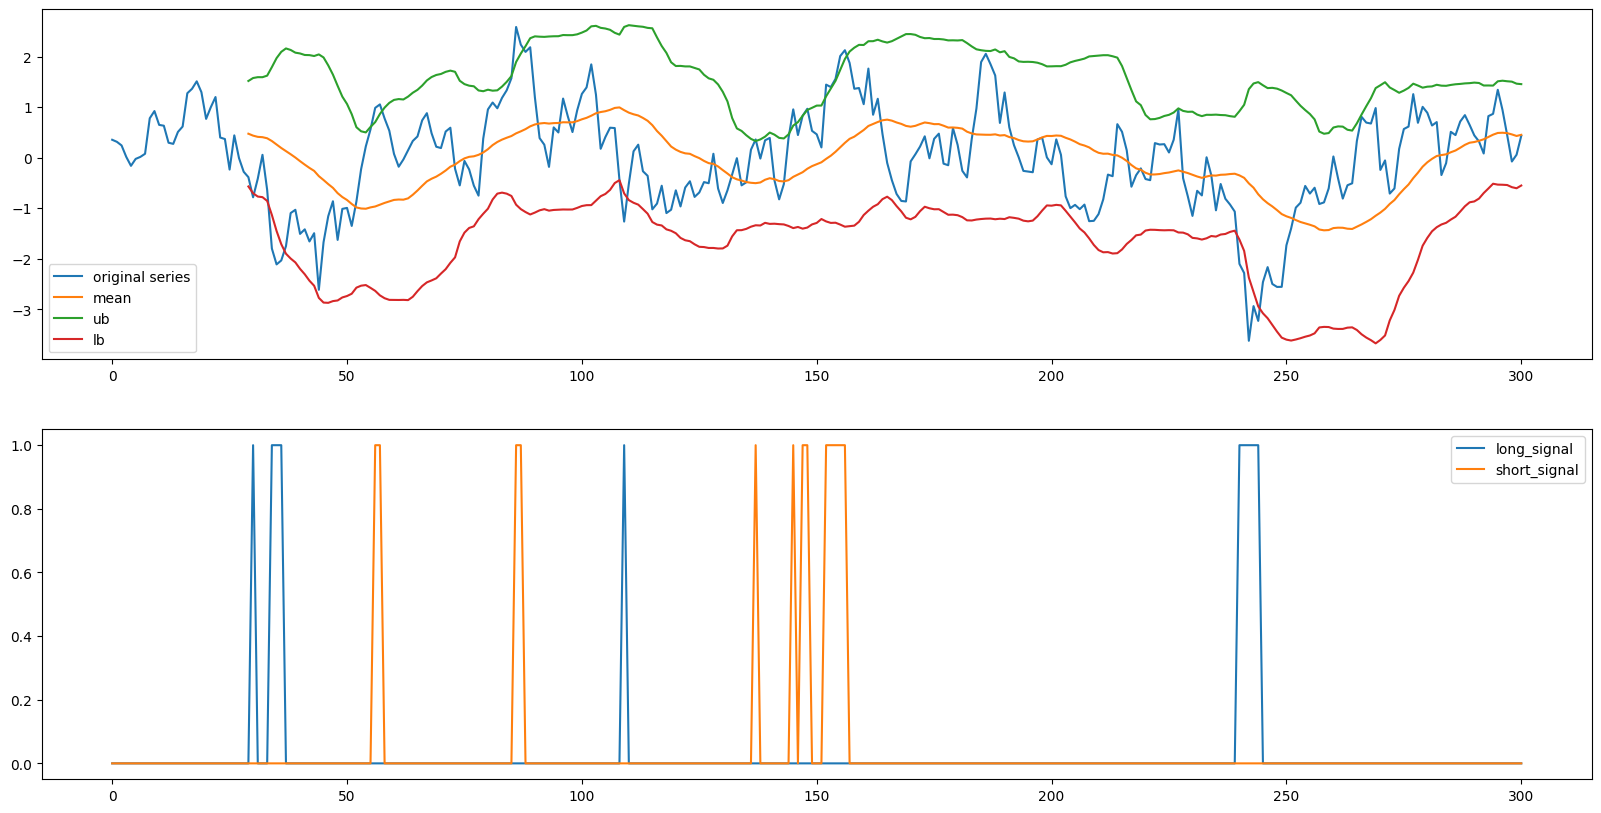

In [75]:
#This code creates a plot with two subplots: the first subplot shows the original
#time series 'z' with its rolling mean and confidence bounds; the second subplot
#displays the long and short trading signals derived from the time series data.
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(long_signal, label='long_signal')
plt.plot(short_signal, label='short_signal')
plt.legend()

In [76]:
position = long_signal - short_signal

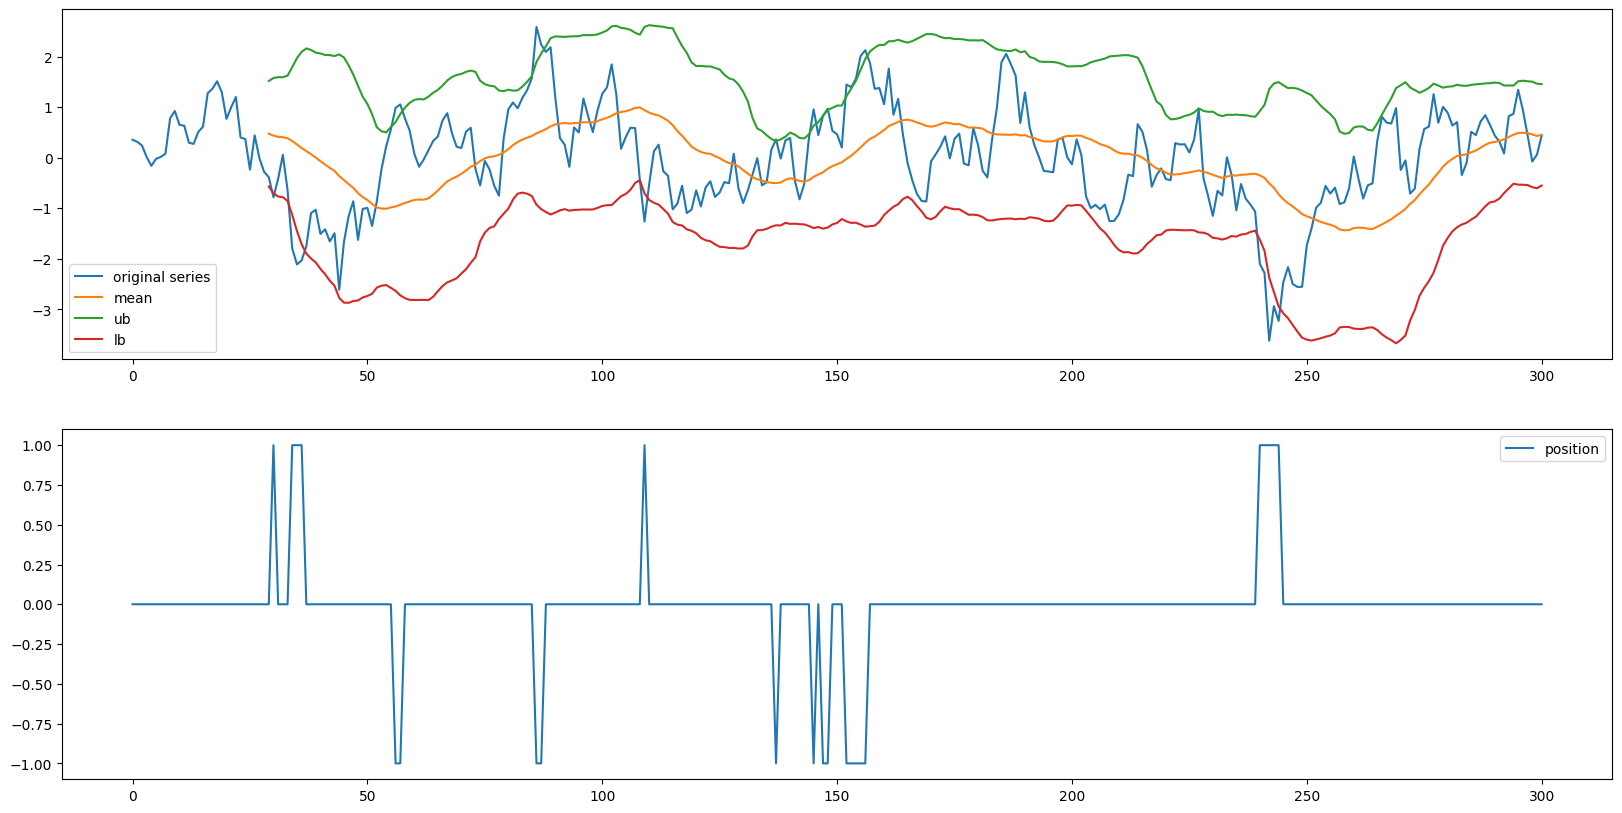

In [77]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(position, label='position')
plt.legend()

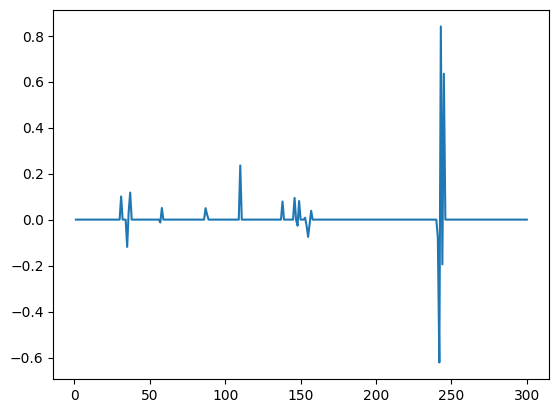

In [78]:
# compute the cumulative return
daily_return = position.shift(1) * series.pct_change()
daily_return.plot();

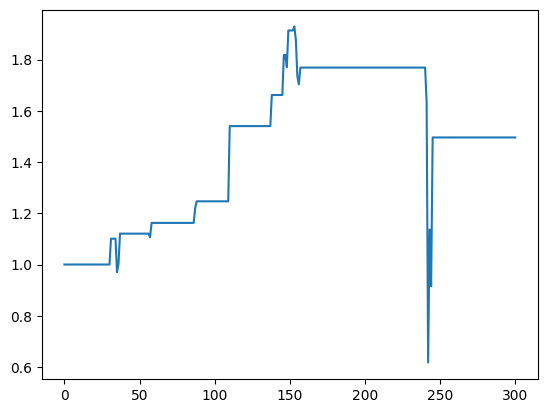

In [79]:
cumulative_return = (daily_return.fillna(value=0) + 1).cumprod()
cumulative_return.plot();

<Axes: >

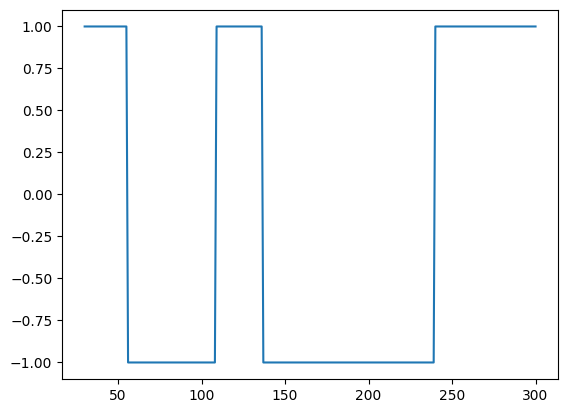

In [80]:
position_filled = position.copy()
position_filled[position == 0] = np.nan
position_filled = position_filled.ffill()
position_filled.plot()


In [81]:
position_filled.head(50)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
dtype: float64

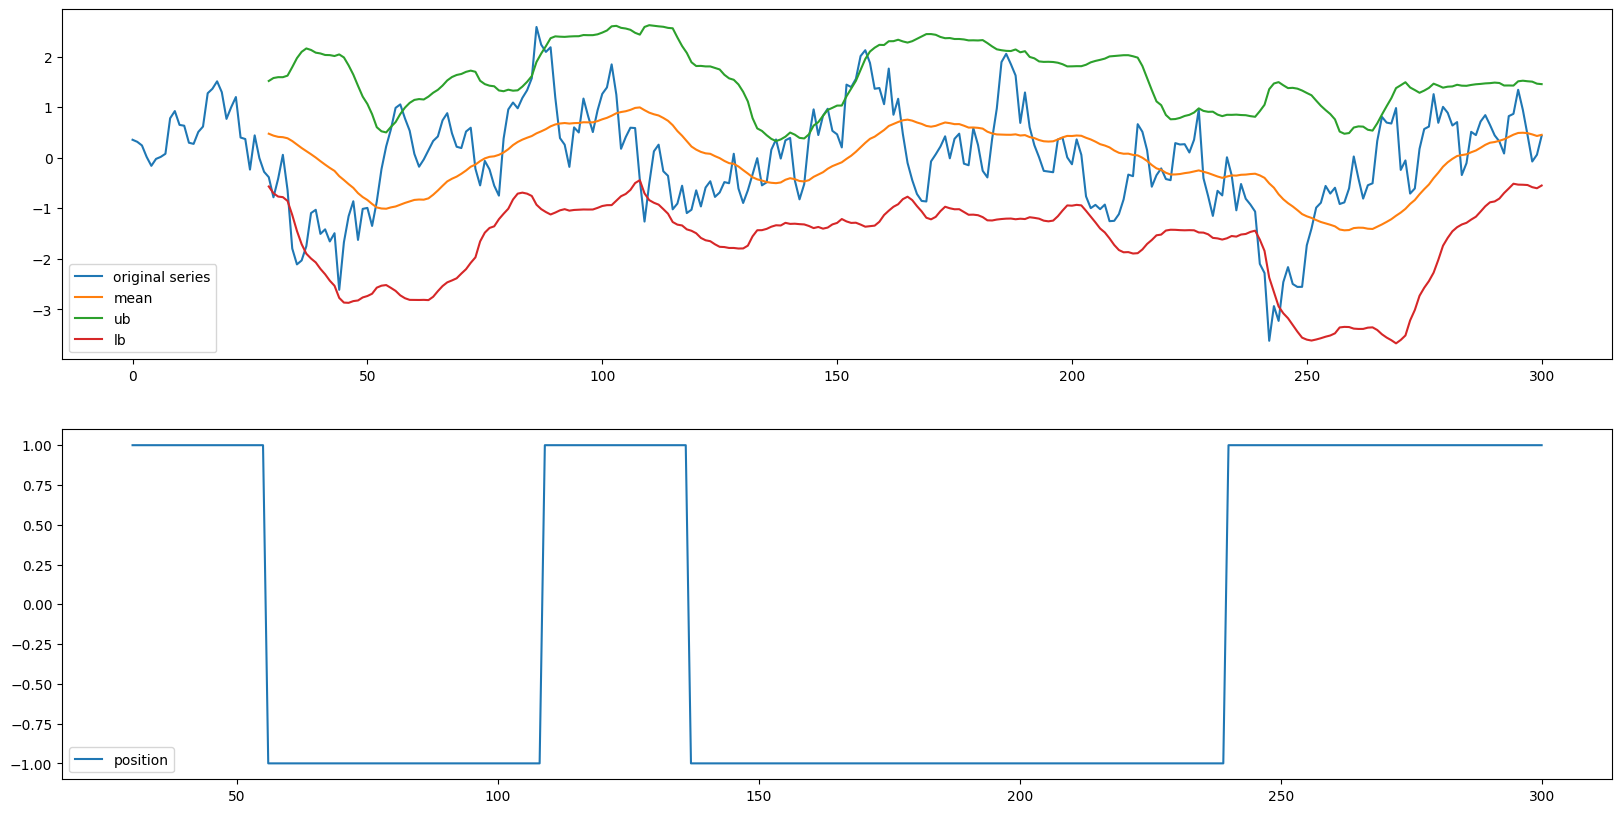

In [82]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(position_filled, label='position')
plt.legend();

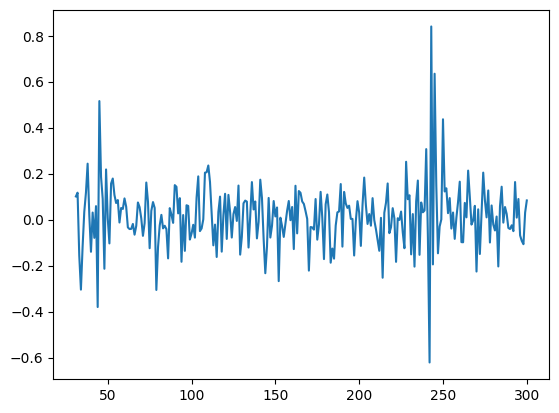

In [83]:
# compute the cumulative return
daily_return2 = position_filled.shift(1) * series.pct_change()
daily_return2.plot();

In [86]:
daily_return2.head(50)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31    0.100781
32    0.117191
33   -0.155049
34   -0.304506
35   -0.118705
36    0.033438
37    0.117625
38    0.243312
39    0.019332
40   -0.139912
41    0.030724
42   -0.079282
43    0.058630
44   -0.380176
45    0.515563
46    0.186204
47    0.090142
48   -0.213767
49    0.218178
dtype: float64

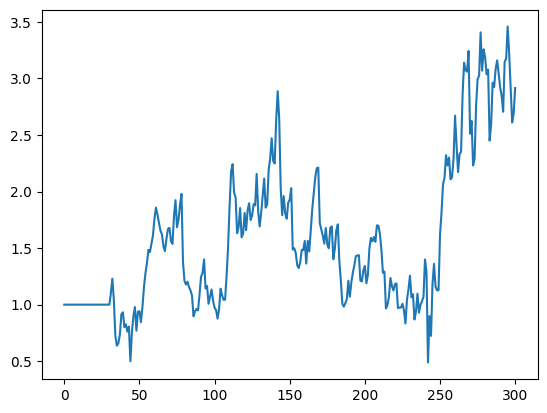

In [87]:
cumulative_return2 = (daily_return2.fillna(value=0) + 1).cumprod()
cumulative_return2.plot();

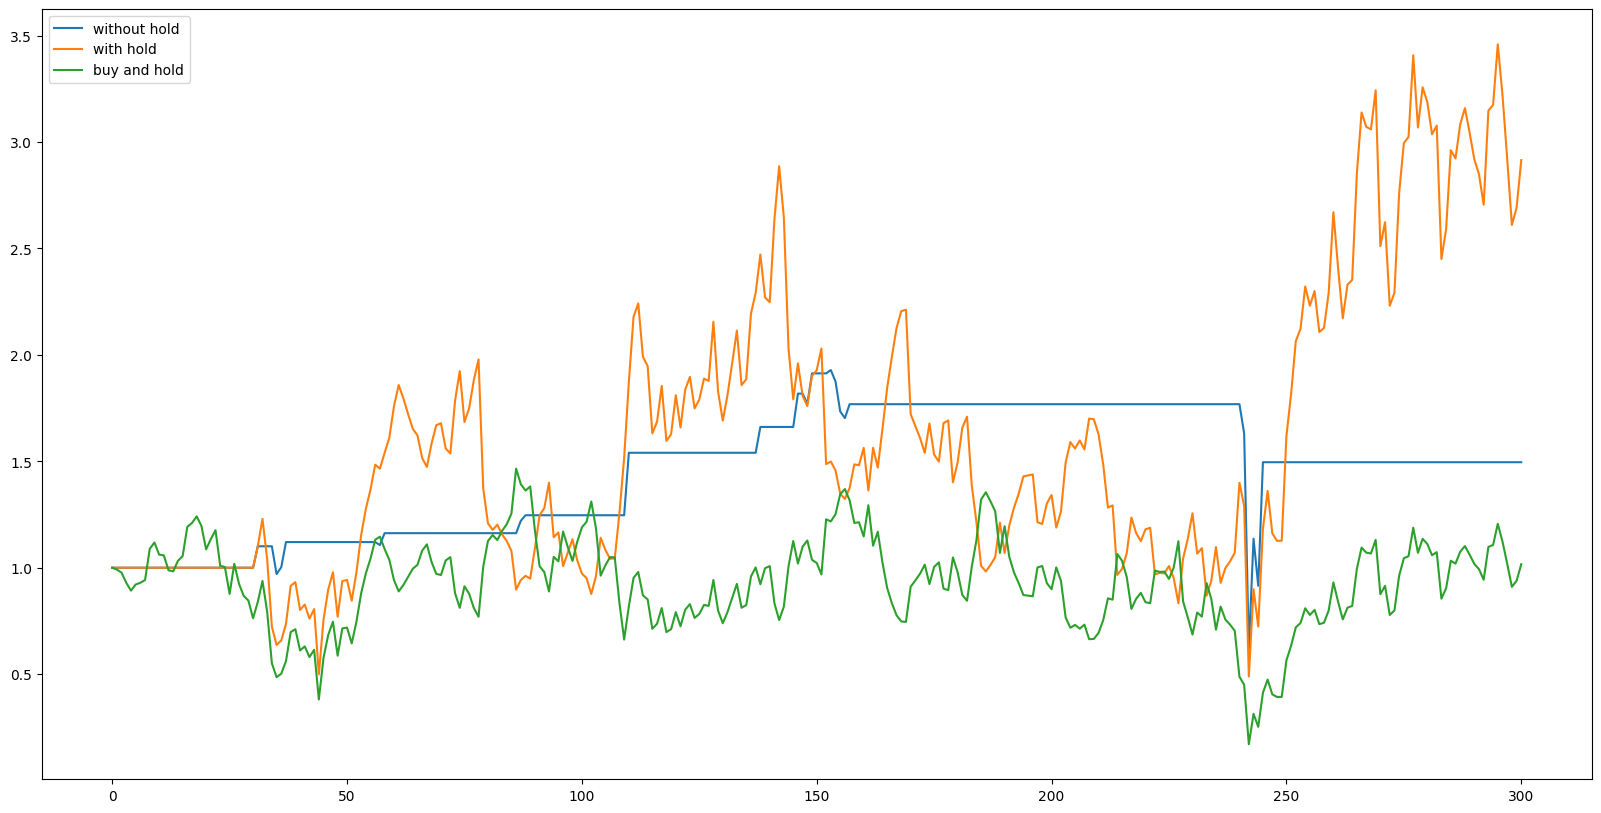

In [88]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative_return, label='without hold')
plt.plot(cumulative_return2, label='with hold')
plt.plot(series / series.iloc[0], label='buy and hold')
plt.legend();

In [89]:
# now let's try with rolling mean and std
# so as not to "cheat" when computing z-score
series_mean = series.rolling(window=30).mean()
series_std = series.rolling(window=30).std()
z = (series - series_mean) / series_std

In [90]:
z_mean = z.rolling(window=30).mean()
z_std = z.rolling(window=30).std()
upper_bound = z_mean + 2 * z_std
lower_bound = z_mean - 2 * z_std


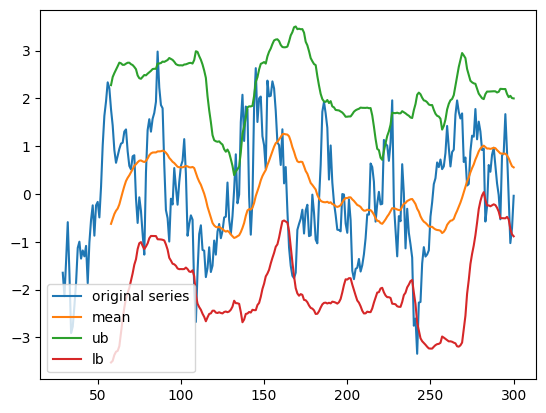

In [91]:
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend();

In [92]:
long_signal = (z < lower_bound).astype(int)
short_signal = (z > upper_bound).astype(int)

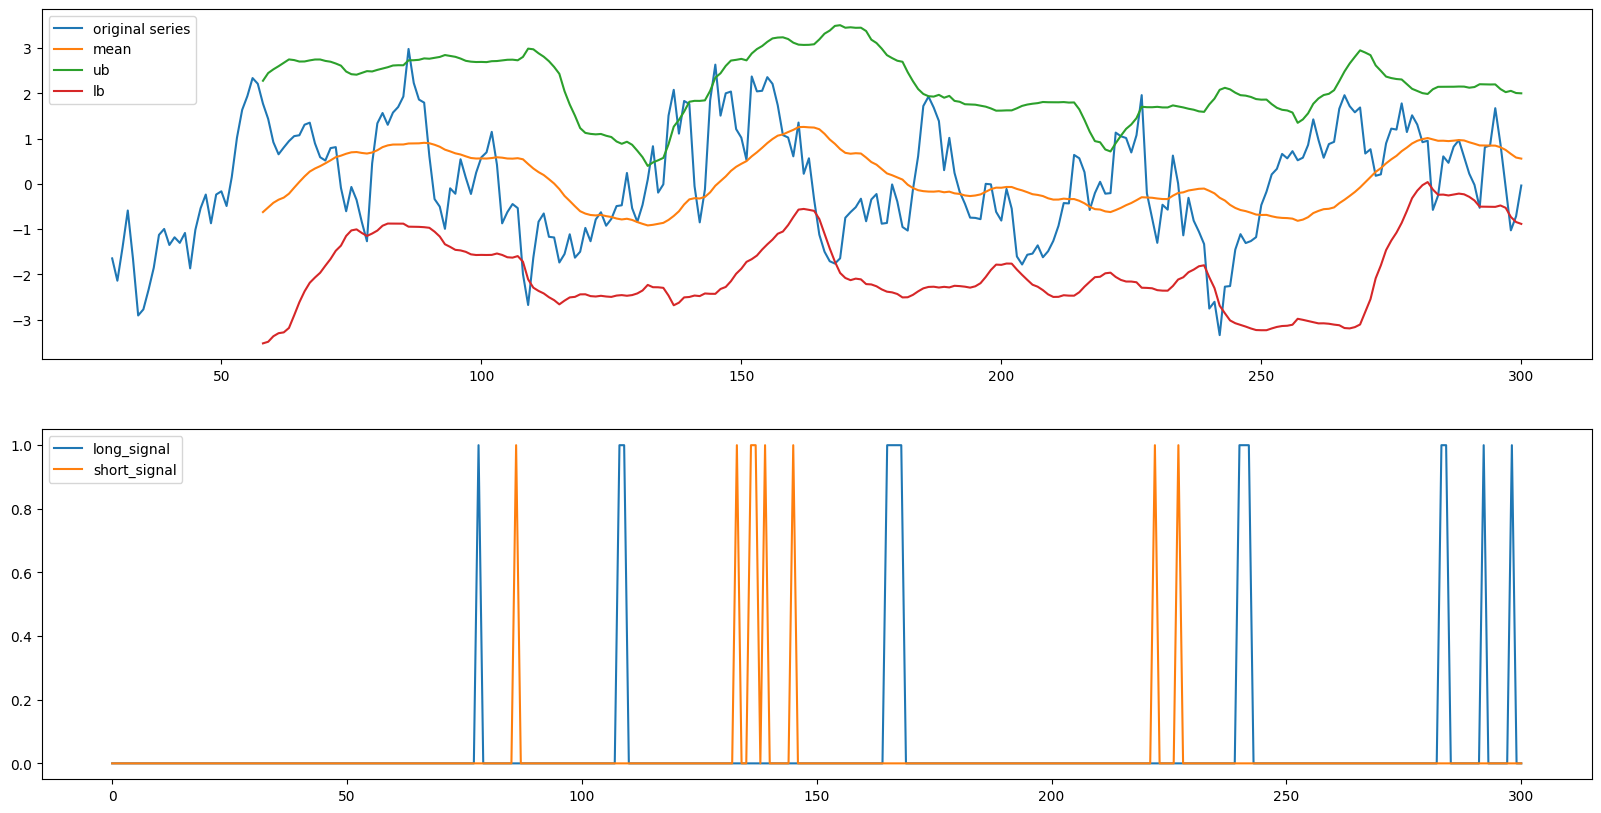

In [93]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.legend()
plt.subplot(212)
plt.plot(long_signal, label='long_signal')
plt.plot(short_signal, label='short_signal')
plt.legend();

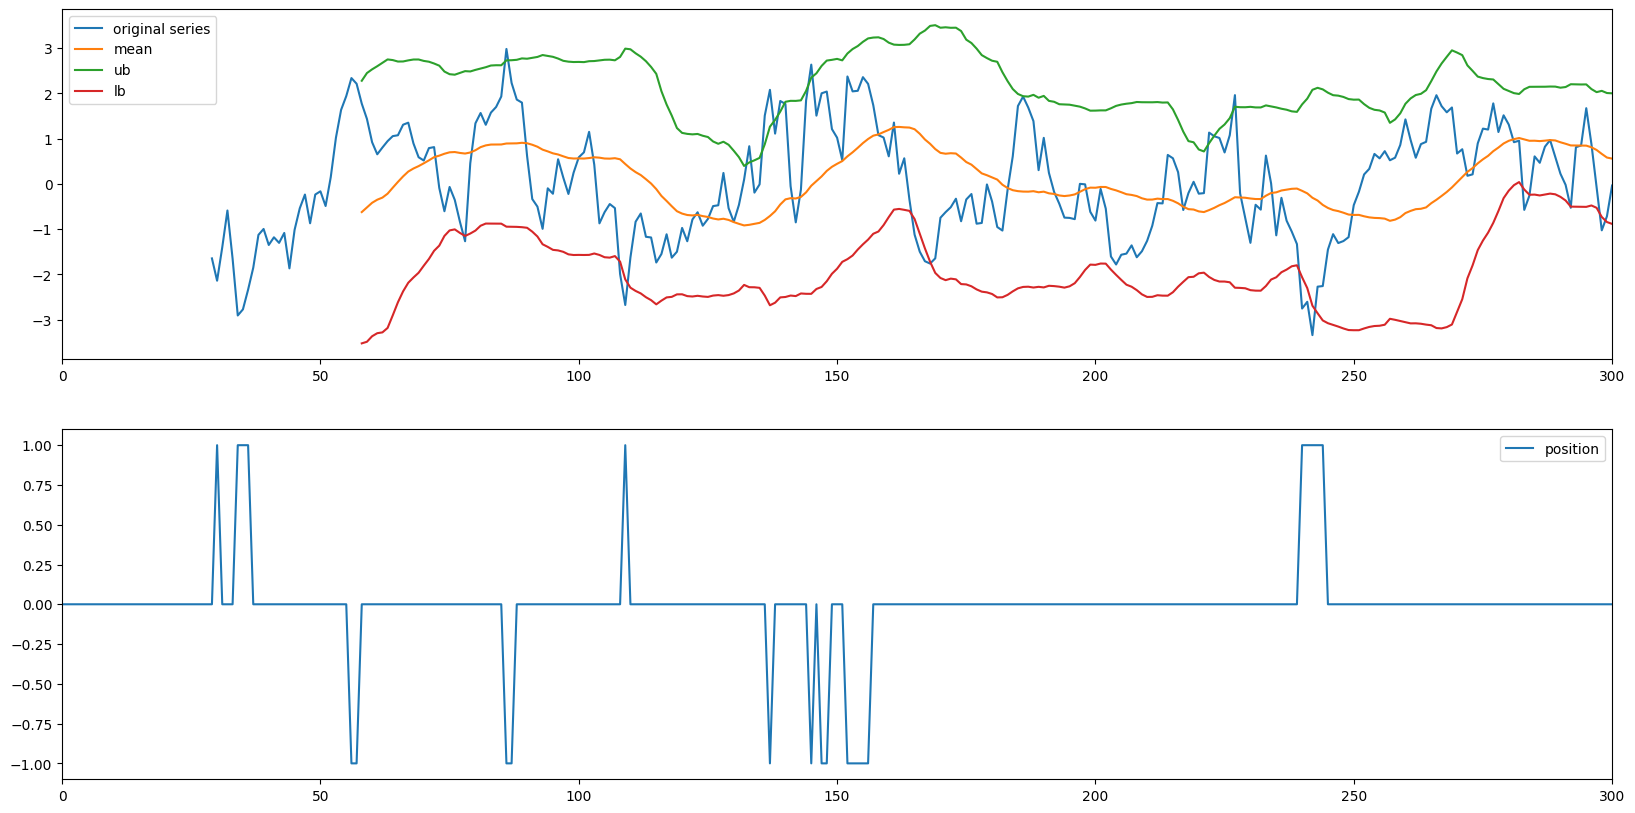

In [94]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.xlim([0, 300])
plt.legend()
plt.subplot(212)
plt.plot(position, label='position')
plt.xlim([0, 300])
plt.legend();

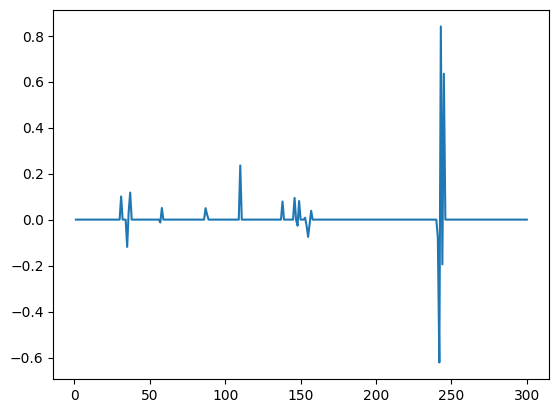

In [95]:
# compute the cumulative return
daily_return = position.shift(1) * series.pct_change()
daily_return.plot();

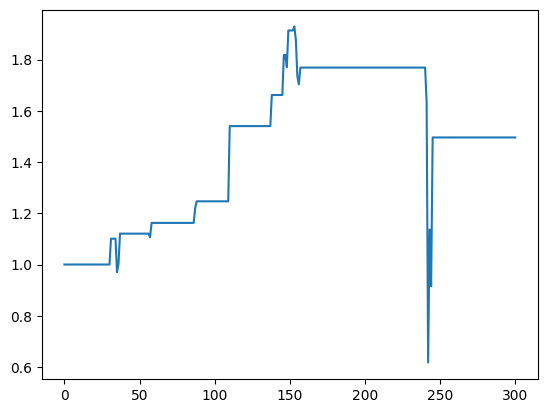

In [96]:
cumulative_return = (daily_return.fillna(value=0) + 1).cumprod()
cumulative_return.plot();

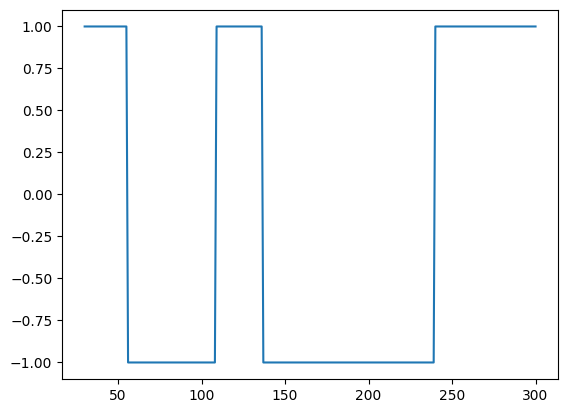

In [97]:
position_filled = position.copy()
position_filled[position == 0] = np.nan
position_filled = position_filled.ffill()
position_filled.plot();


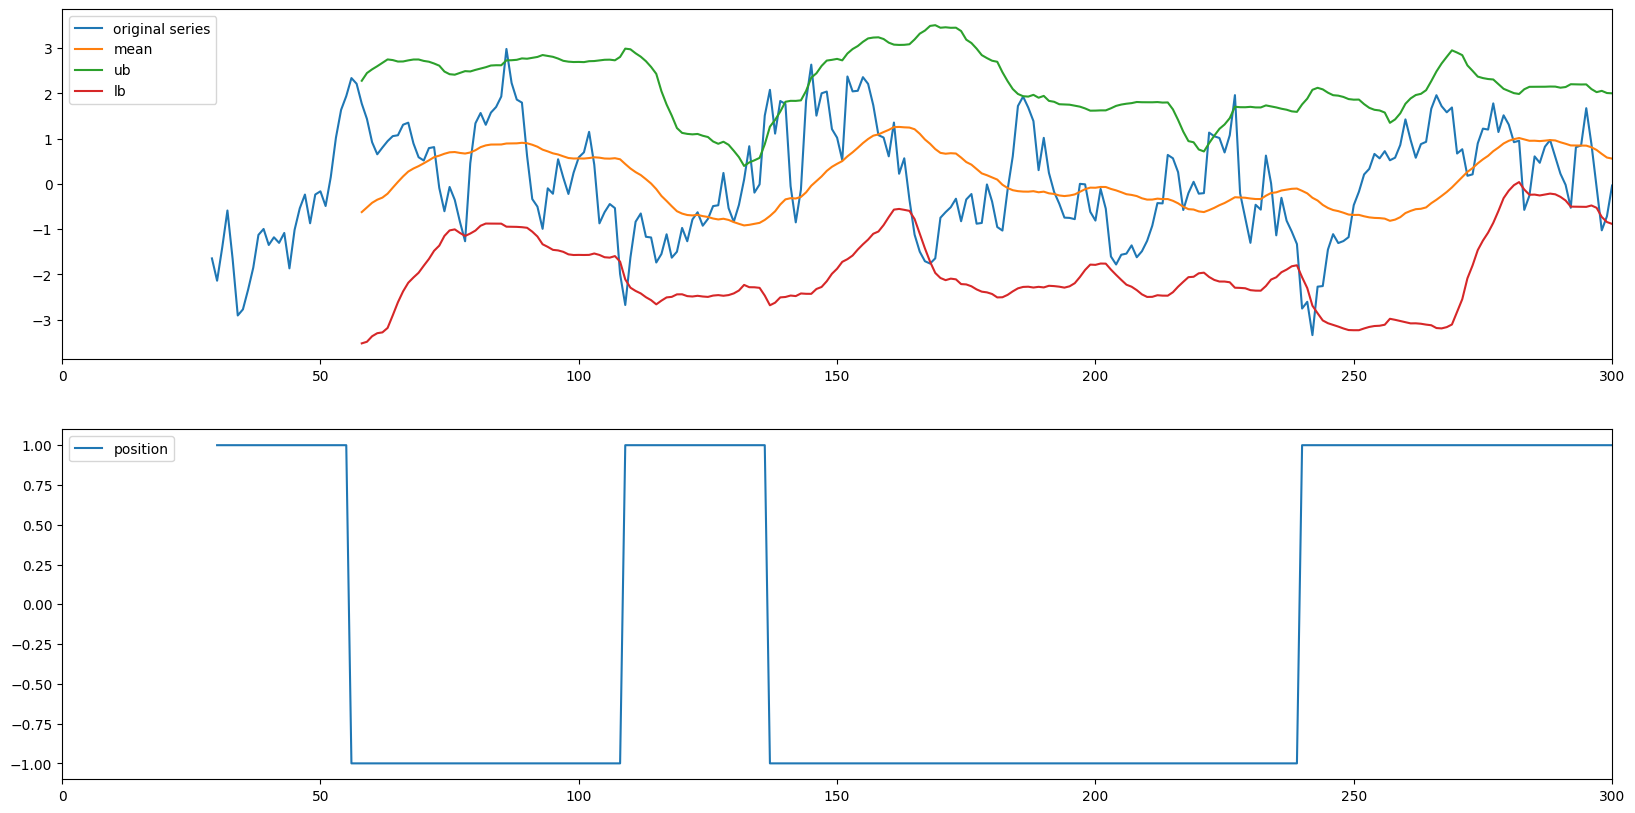

In [98]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(z, label='original series')
plt.plot(z_mean, label='mean')
plt.plot(upper_bound, label='ub')
plt.plot(lower_bound, label='lb')
plt.xlim([0, 300])
plt.legend()

plt.subplot(212)
plt.plot(position_filled, label='position')
plt.xlim([0, 300])
plt.legend();

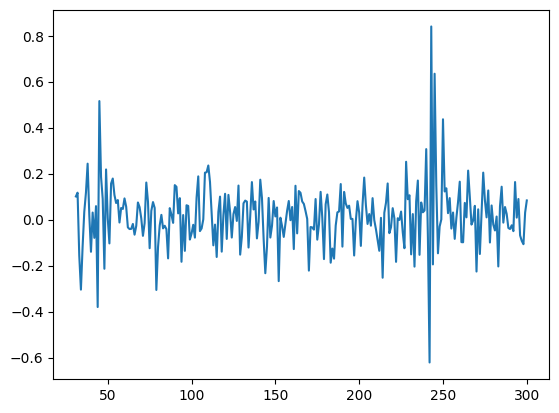

In [101]:
# compute the cumulative return
daily_return2 = position_filled.shift(1) * series.pct_change()
daily_return2.plot();

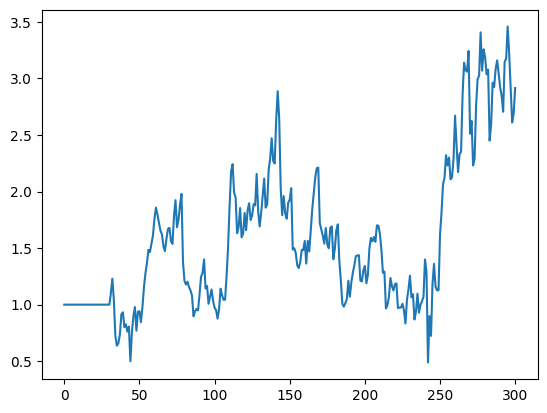

In [102]:
cumulative_return2 = (daily_return2.fillna(value=0) + 1).cumprod()
cumulative_return2.plot();

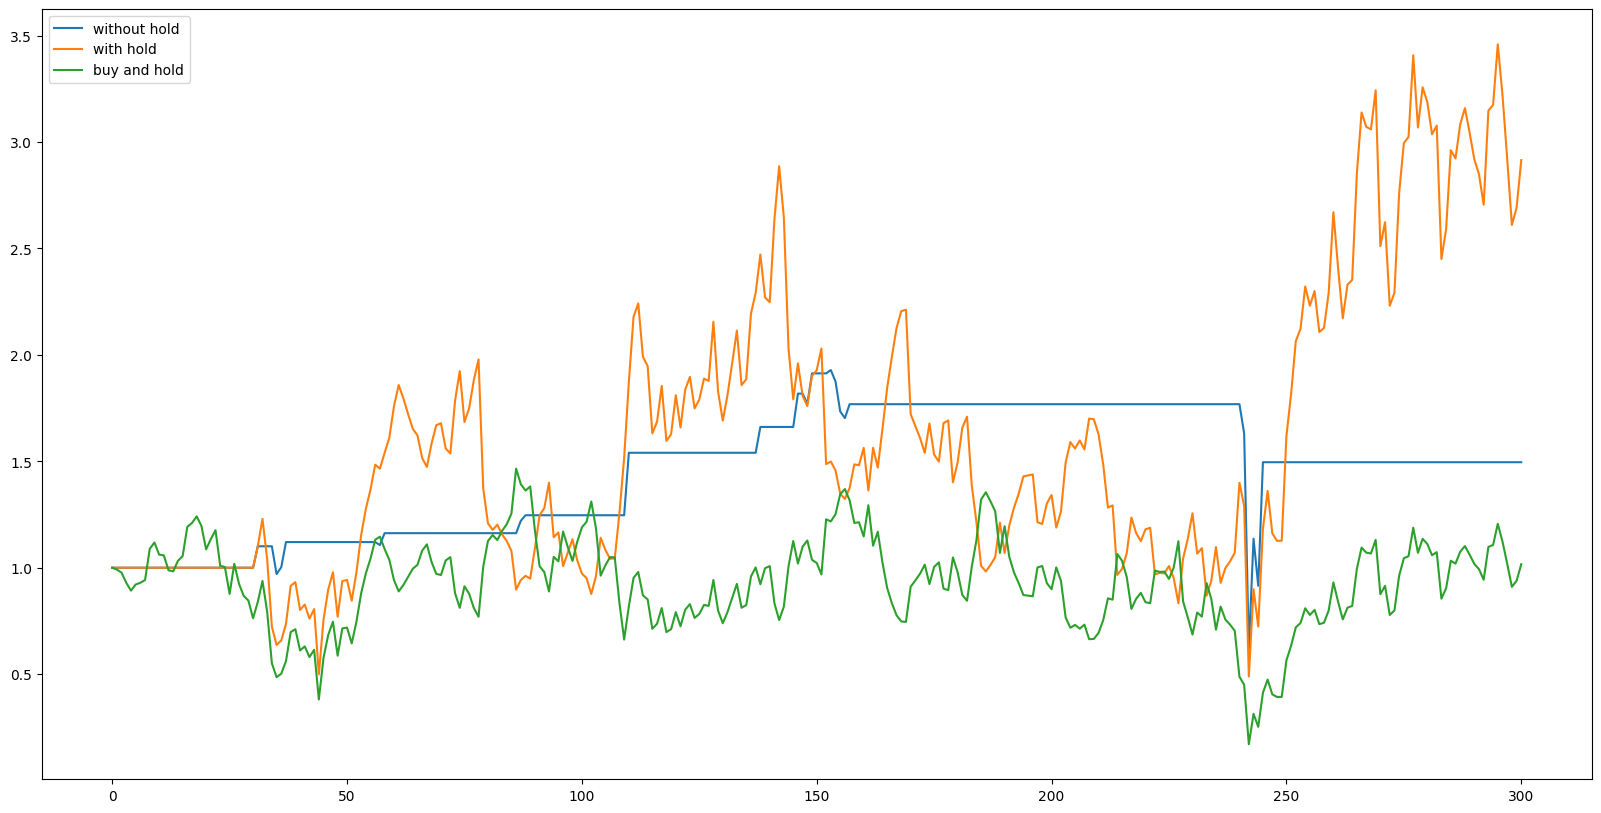

In [103]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative_return, label='without hold')
plt.plot(cumulative_return2, label='with hold')
plt.plot(series / series.iloc[0], label='buy and hold')
plt.legend();

In [104]:
cumulative_return2.head(100)

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
        ...   
95    1.165838
96    1.007410
97    1.070285
98    1.133941
99    1.035673
Length: 100, dtype: float64